In [1]:
# Linear Regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 데이터셋 불러오기
file_path = 'C:\\Users\\co279\\mp1.csv'
data = pd.read_csv(file_path)

# 필요 없는 컬럼 제거
data = data.drop(columns=['last_name, first_name', 'player_id'])

# 결측치 처리 (예: 0으로 대체)
data = data.fillna(0)

# 학습 데이터와 테스트 데이터 분리
train_data = data[data['year'] != 2023]
test_data = data[data['year'] == 2023]

# 독립변수와 종속변수 분리
X_train = train_data.drop(columns=['p_era', 'year'])
y_train = train_data['p_era']
X_test = test_data.drop(columns=['p_era', 'year'])
y_test = test_data['p_era']

# 모델 정의
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

# 실제 값과 예측 값 비교
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


RMSE: 0.5856959571266213
MAE: 0.444660916244982
MAPE: 0.11719676379949849
R2: 0.795499369320047
      Actual  Predicted
3151    7.40   7.027021
3152    5.06   5.124861
3153    3.22   3.346721
3154    3.63   4.182887
3155    7.04   6.935548
...      ...        ...
3589    3.81   3.543481
3590    5.72   5.879794
3591    5.81   5.046540
3592    9.00   7.089501
3593    4.84   4.397243

[443 rows x 2 columns]


c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge Regression - RMSE: 0.6251449382053563, MAE: 0.469681640772041, MAPE: 0.1237857751873012, R2: 0.7830102587895973
Lasso Regression - RMSE: 0.6540769141834977, MAE: 0.4855378006939097, MAPE: 0.12763384260958288, R2: 0.7624607365526017


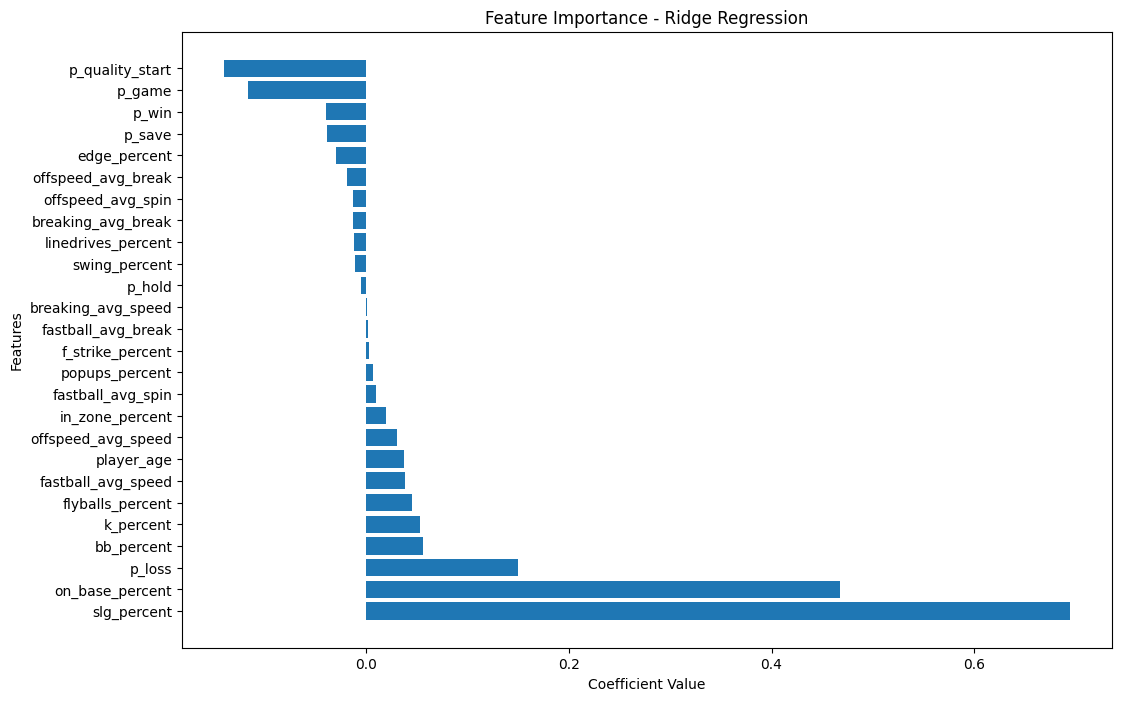

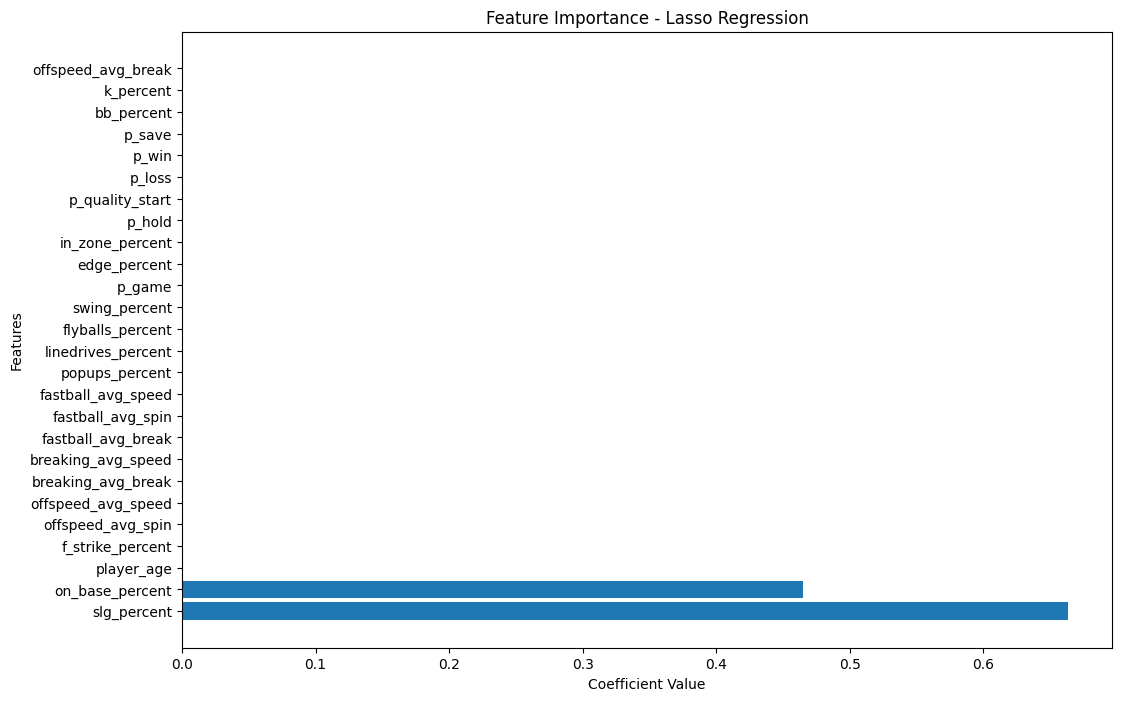

In [30]:
# Ridge, Lasso

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
file_path = 'C:\\Users\\co279\\mp1.csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=['last_name, first_name', 'player_id'])

# Fill missing values
data = data.fillna(0)

# Define target and features
target = 'p_era'
features = data.columns.drop([target, 'year'])

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and fit Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Define and fit Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions
ridge_pred = ridge_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)

# Evaluate the Ridge model
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mape = mean_absolute_percentage_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f'Ridge Regression - RMSE: {ridge_rmse}, MAE: {ridge_mae}, MAPE: {ridge_mape}, R2: {ridge_r2}')

# Evaluate the Lasso model
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mape = mean_absolute_percentage_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f'Lasso Regression - RMSE: {lasso_rmse}, MAE: {lasso_mae}, MAPE: {lasso_mape}, R2: {lasso_r2}')

# Feature importance for Ridge
ridge_coefficients = pd.DataFrame({'Feature': features, 'Coefficient': ridge_model.coef_})
ridge_coefficients = ridge_coefficients.sort_values(by='Coefficient', ascending=False)

# Feature importance for Lasso
lasso_coefficients = pd.DataFrame({'Feature': features, 'Coefficient': lasso_model.coef_})
lasso_coefficients = lasso_coefficients.sort_values(by='Coefficient', ascending=False)

# Plotting Ridge feature importance
plt.figure(figsize=(12, 8))
plt.barh(ridge_coefficients['Feature'], ridge_coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance - Ridge Regression')
plt.show()

# Plotting Lasso feature importance
plt.figure(figsize=(12, 8))
plt.barh(lasso_coefficients['Feature'], lasso_coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance - Lasso Regression')
plt.show()

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 재계산
X_train_df = pd.DataFrame(X_train_scaled, columns=features)

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

# VIF가 10 미만인 변수들만 선택
selected_features = vif_data[vif_data["VIF"] < 10]["feature"].tolist()

print("VIF가 10 미만인 변수들:")
print(vif_data[vif_data["VIF"] < 10])

VIF가 10 미만인 변수들:
               feature       VIF
0           player_age  1.333339
1               p_game  4.060728
2            k_percent  2.489519
3           bb_percent  4.294862
4          slg_percent  4.599698
5      on_base_percent  6.578659
6               p_save  1.981938
7                p_win  3.732148
8               p_loss  2.042983
9      p_quality_start  5.817980
10              p_hold  3.716019
11     in_zone_percent  1.464774
12        edge_percent  1.242778
13       swing_percent  2.198530
14    f_strike_percent  1.707294
15    flyballs_percent  2.036728
16  linedrives_percent  1.214835
17      popups_percent  1.594392
18  fastball_avg_speed  2.345479
19   fastball_avg_spin  1.580609
20  fastball_avg_break  1.521428
21  breaking_avg_speed  1.155160
22  breaking_avg_break  1.342707
23  offspeed_avg_speed  6.169650
24   offspeed_avg_spin  8.391286
25  offspeed_avg_break  7.108494


In [27]:
# Elastic Net

import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = 'C:\\Users\\co279\\mp1.csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=['last_name, first_name', 'player_id'])

# Fill missing values
data = data.fillna(0)

# Define target and features
target = 'p_era'
features = data.columns.drop([target, 'year'])

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and fit Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha is the overall strength, l1_ratio is the mixing parameter
elastic_net.fit(X_train_scaled, y_train)

# Make predictions
y_pred = elastic_net.predict(X_test_scaled)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

RMSE: 0.9440499180228475
MAE: 0.7262652244012309
MAPE: 0.20118264442719574
R2: 0.5051567147671424


c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
